# Classical and Streaming Algorithms Templates


-- Generating the stream
:generating randomly with 100 elements between -10 and 10

-- classicalAlg
:memory = {'mean': -4.988449999999998, 'std': 18.479455811454514}

-- streamAlg
:memory = {'sum_of_values': -498.84499999999974, 'sum_of_squares': 46088.936322752095, 'count': 100, 'mean_stm': -4.988449999999998, 'std': 21.468333964877687}
:statistics
  - classical memory usage = 102
  - stream memory usage = 5
  - stream uses only 4.902% of the memory

-- Compare ['mean'] with ['mean_stm']
:cache_instances 100
:first 3 values of the stream [0, 9.147, -9.909]


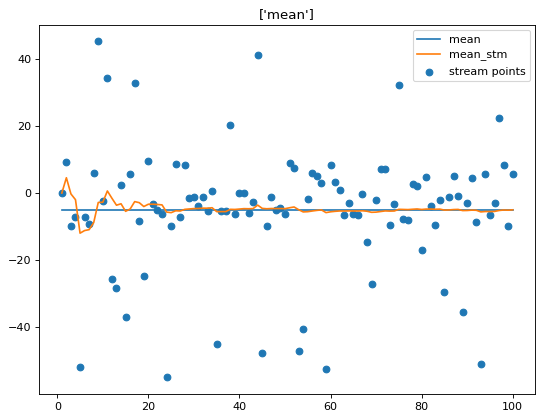

In [17]:
from libs.simulateStream import *
import numpy as np

## THE CLASSICAL ALGORITHM THAT YOU SHOULD IMPLEMENT

def classicalAlg(stream):
    memory = {}
    ## add the results as key value to the dictionary
    A = np.array(stream)
    memory['mean'] = sum(stream)/len(stream)
    mean1 = np.mean(A)
    memory['std'] = np.std(A)

    return memory

## THE STREAMMING ALGORITHM THAT YOU SHOULD IMPLEMENT

def streamAlg_init(memory):

    # internal variables
    memory = {
    "sum_of_values": 0,
    "sum_of_squares":  0,
    "count": 0,
    }
    # result variables

    return memory

def streamAlg_run(memory, x):

    # internal variables
    memory["sum_of_values"] += x
    memory["count"] += 1
    memory["mean_stm"] = memory["sum_of_values"] / memory["count"]
    memory["sum_of_squares"] += (memory["mean_stm"]+x)**2
    memory["std"] = (memory["sum_of_squares"]/memory["count"])**0.5
    # result variables

    return memory

ss = SimulateStream(N=100, min=-10, max=10, outliers=0.3,classicalAlg=classicalAlg,streamAlg_init=streamAlg_init, streamAlg_run=streamAlg_run)

ss.compare(['mean'],['mean_stm'])